# Lagrange-Interpolationspolynom

Gegeben sind $n$ Punkte einer unbekannten Funktion $y = f(x)$

Gesucht ist das Interpolationspolynom $P_n(x)$, dass an den gegebenen Punkten mit $f(x)$ übereinstimmt.

In [18]:
# input given points
points = [
(0, -2),
(1, -2),
(2, -1),
(3, 1),
]

In [19]:
n = len(points)
X = [p[0] for p in points]
Y = [p[1] for p in points]

In [20]:
L = []
var('x')
for k in range(n):
    Lnk = (prod([(x - X[i]) for i in range(len(X)) if i != k])) / (prod([(X[k] - X[i]) for i in range(len(X)) if i != k]))
    L.append(Lnk.simplify_full())

In [21]:
for i, l in enumerate(L):
    print i, ":", l

0 : -1/6*x^3 + x^2 - 11/6*x + 1
1 : 1/2*x^3 - 5/2*x^2 + 3*x
2 : -1/2*x^3 + 2*x^2 - 3/2*x
3 : 1/6*x^3 - 1/2*x^2 + 1/3*x


In [22]:
P = sum([Y[k] * L[k] for k in range(n)])
P.simplify_full()

1/2*x^2 - 1/2*x - 2

In [23]:
# some sanity checking
for k in range(n):
    yc = P.subs(x=X[k])
    yg = Y[k]
    assert yc == yg, "computed y {} != {} given y".format(yc, yg)

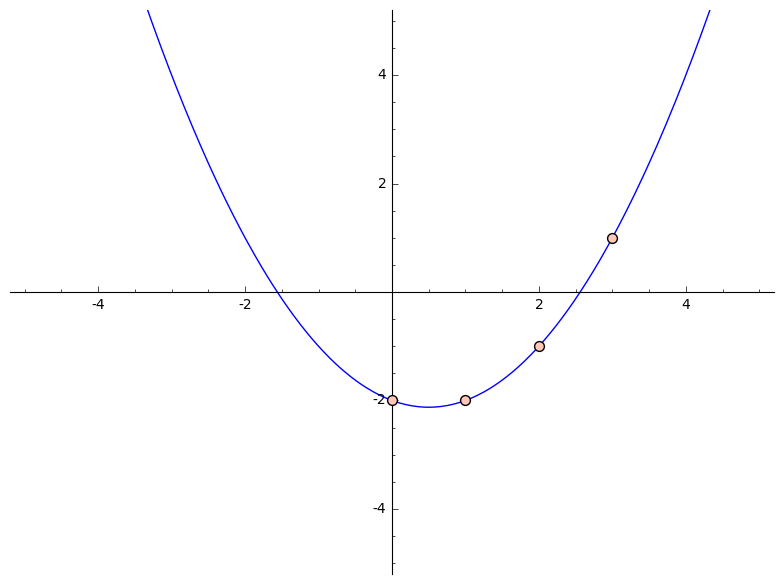

In [24]:
R = 5
scatter_plot(points) + plot(P, xmax=R, ymax=R, ymin=-R, xmin=-R)